___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours on average an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insights

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [22]:
data = pd.read_csv("HR_dataset.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
data = data.rename(columns={'average_montly_hours':'average_monthly_hours'})

In [24]:
columns = list(data.columns)
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Departments ',
 'salary']

In [25]:
new_cols = []
for i in columns:
    i = i.lower().strip()
    new_cols.append(i)
new_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'departments',
 'salary']

In [26]:
print(columns)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments ', 'salary']


In [27]:
new_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'departments',
 'salary']

In [28]:
data.rename(columns=dict(zip(columns, new_cols)), inplace=True)

In [29]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [32]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [64]:
data.duplicated().sum()

3008

In [70]:
data.drop_duplicates(inplace=True)

In [71]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [72]:
data["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [73]:
data.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


In [36]:
# Satisfaction Level only 66% for current employees and 44% for employees that have left

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [74]:
df = data.groupby("left").mean()
df.reset_index(inplace=True)

Text(0.5, 1.0, 'Employees that have Left')

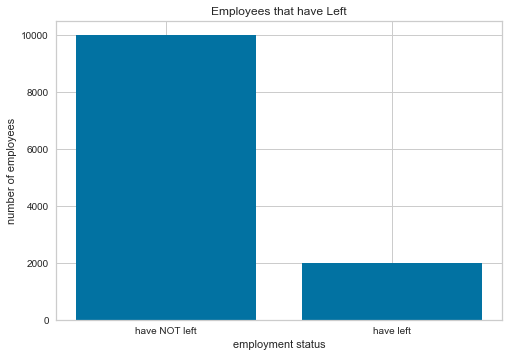

In [75]:
fig, ax = plt.subplots()
plt.bar(df["left"].replace({0:'have NOT left', 1:'have left'}), data["left"].value_counts().sort_index())
plt.xticks(df["left"])
plt.xlabel('employment status')
plt.ylabel('number of employees')
plt.title('Employees that have Left')

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [76]:
df = data.groupby("number_project").count()
df.reset_index(inplace=True)

Text(0.5, 1.0, 'Employee Project Count')

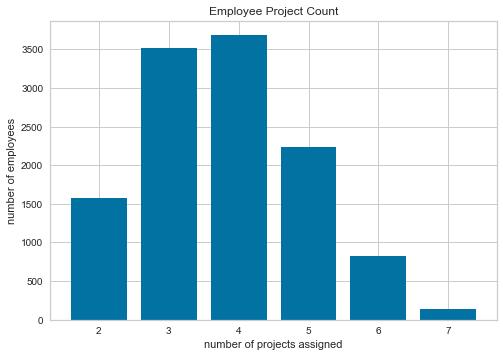

In [77]:
fig, ax = plt.subplots()
plt.bar(df["number_project"], data["number_project"].value_counts().sort_index())
plt.xticks(df["number_project"])
plt.xlabel('number of projects assigned')
plt.ylabel('number of employees')
plt.title('Employee Project Count')

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


In [78]:
df = data.groupby("time_spend_company").count()
df.reset_index(inplace=True)

Text(0.5, 1.0, 'Time Spent with Company')

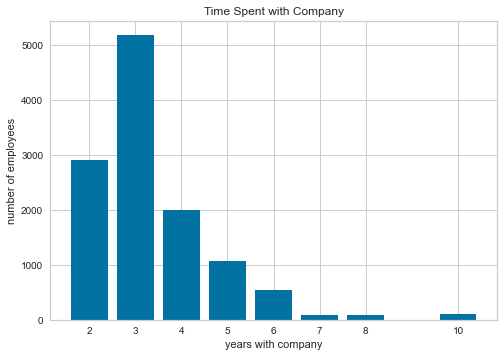

In [79]:
fig, ax = plt.subplots()
plt.bar(df["time_spend_company"], data["time_spend_company"].value_counts().sort_index())
plt.xticks(df["time_spend_company"])
plt.xlabel('years with company')
plt.ylabel('number of employees')
plt.title('Time Spent with Company')

### Subplots of Features

You can use the methods of the matplotlib.

## 3. Data Pre-Processing

#### Ordinal Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as ordinal encoding, and sklearn conveniently will do this for you using [OrdinalEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder).



In [80]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [83]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [84]:
enc = OrdinalEncoder()

In [188]:
df1 = data.copy()
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [189]:
df2 = data.drop("left", axis=1)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [190]:
X = df2[["departments", "salary"]]

In [191]:
df2[["departments", "salary"]] = enc.fit_transform(X)

In [192]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,7.0,1.0
1,0.80,0.86,5,262,6,0,0,7.0,2.0
2,0.11,0.88,7,272,4,0,0,7.0,2.0
3,0.72,0.87,5,223,5,0,0,7.0,1.0
4,0.37,0.52,2,159,3,0,0,7.0,1.0


#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [193]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [194]:
scaler = MinMaxScaler()

In [195]:
scaler.fit(df2)

MinMaxScaler()

In [196]:
df_scaled = scaler.transform(df2)

In [197]:
df_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 0.77777778,
        0.5       ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.77777778,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.77777778,
        1.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 1.        , 0.44444444,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 1.        , 0.55555556,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 0.        ,
        0.5       ]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [198]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [199]:
ssd = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df_scaled))
    ssd.append(kmeans.inertia_)

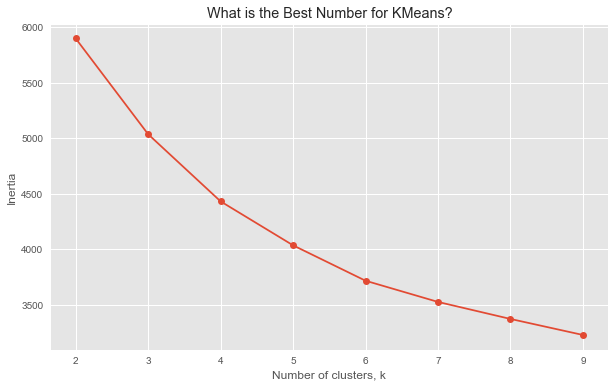

In [200]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(K, ssd, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(K)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

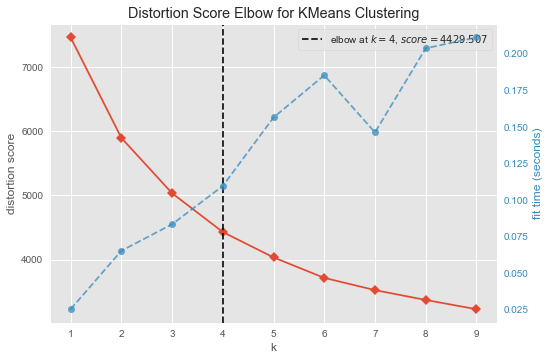

In [201]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df_scaled)
visu.show();

In [202]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.3206987112924166
Silhouette Score for 3 clusters: 0.22209922292746462
Silhouette Score for 4 clusters: 0.19906746316679588
Silhouette Score for 5 clusters: 0.2104284668094636
Silhouette Score for 6 clusters: 0.20814652281742482
Silhouette Score for 7 clusters: 0.19687329434578638
Silhouette Score for 8 clusters: 0.1933903394694238
Silhouette Score for 9 clusters: 0.19333042813232126


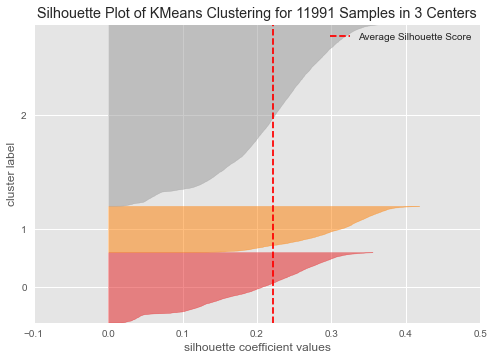

In [203]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model_3 = KMeans(n_clusters = 3, random_state = 101)
visualizer = SilhouetteVisualizer(model_3)
visualizer.fit(df_scaled)
visualizer.poof();

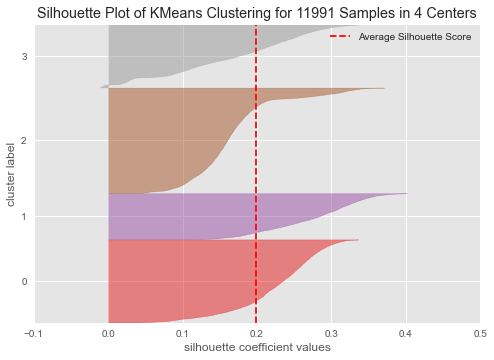

In [204]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model_4 = KMeans(n_clusters = 4, random_state = 101)
visualizer = SilhouetteVisualizer(model_4)
visualizer.fit(df_scaled)
visualizer.poof();

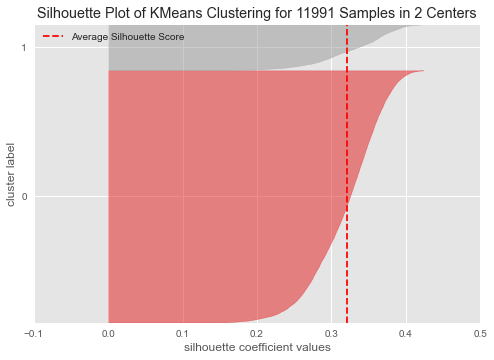

In [205]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model_2 = KMeans(n_clusters = 2, random_state = 101)
visualizer = SilhouetteVisualizer(model_2)
visualizer.fit(df_scaled)
visualizer.poof();

In [206]:
k_means_model2 = KMeans(n_clusters = 4, random_state = 101)
k_means_model2.fit_predict(df_scaled)
labels = k_means_model2.labels_
labels

array([2, 0, 0, ..., 2, 2, 3])

In [212]:
df1['predicted_clusters'] = labels
df1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary,predicted_clusters
0,0.38,0.53,2,157,3,0,1,0,sales,low,2
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,2
4,0.37,0.52,2,159,3,0,1,0,sales,low,2
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,1
11996,0.74,0.95,5,266,10,0,0,1,management,high,2
11997,0.85,0.54,3,185,10,0,0,1,management,high,2
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,2


In [213]:
df1['predicted_clusters'].value_counts()

2    4243
0    3349
3    2549
1    1850
Name: predicted_clusters, dtype: int64

In [214]:
df1.groupby(['left', 'predicted_clusters']).mean()

satisfaction_level  last_evaluation  number_project  \
left predicted_clusters                                                        
0    0                             0.668318         0.717095        3.798009   
     1                             0.664636         0.714132        3.787966   
     2                             0.669114         0.712977        3.786734   
     3                             0.665541         0.719370        3.770783   
1    0                             0.446760         0.727318        3.927374   
     1                             0.445524         0.719524        3.780952   
     2                             0.444120         0.723757        3.874007   
     3                             0.424402         0.712222        3.873932   

                         average_monthly_hours  time_spend_company  \
left predicted_clusters                                              
0    0                              199.170341            3.277383   
     1                              198.684814            3.334670   
     2                              198.978882            3.232897   
     3                              198.792888            3.227295   
1    0                              210.599628            3.897579   
     1                              204.352381            3.866667   
     2                              207.576617            3.893303   
     3                              207.322650            3.844017   

                         work_accident  promotion_last_5years  
left predicted_clusters                                        
0    0                             0.0               0.024182  
     1                             1.0               0.026361  
     2                             0.0               0.014872  
     3                             0.0               0.014897  
1    0                             0.0               0.001862  
     1                             1.0               0.019048  
     2                             0.0               0.002270  
     3                             0.0               0.006410

In [215]:
df1.groupby(['predicted_clusters', 'left']).mean()

satisfaction_level  last_evaluation  number_project  \
predicted_clusters left                                                        
0                  0               0.668318         0.717095        3.798009   
                   1               0.446760         0.727318        3.927374   
1                  0               0.664636         0.714132        3.787966   
                   1               0.445524         0.719524        3.780952   
2                  0               0.669114         0.712977        3.786734   
                   1               0.444120         0.723757        3.874007   
3                  0               0.665541         0.719370        3.770783   
                   1               0.424402         0.712222        3.873932   

                         average_monthly_hours  time_spend_company  \
predicted_clusters left                                              
0                  0                199.170341            3.277383   
                   1                210.599628            3.897579   
1                  0                198.684814            3.334670   
                   1                204.352381            3.866667   
2                  0                198.978882            3.232897   
                   1                207.576617            3.893303   
3                  0                198.792888            3.227295   
                   1                207.322650            3.844017   

                         work_accident  promotion_last_5years  
predicted_clusters left                                        
0                  0               0.0               0.024182  
                   1               0.0               0.001862  
1                  0               1.0               0.026361  
                   1               1.0               0.019048  
2                  0               0.0               0.014872  
                   1               0.0               0.002270  
3                  0               0.0               0.014897  
                   1               0.0               0.006410

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts, for example, in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [255]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

In [220]:
model_df = df2.drop("predicted_clusters", axis=1)

In [ ]:
model_df["left"] = df1.left

In [224]:
model_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary,left
0,0.38,0.53,2,157,3,0,0,7.0,1.0,1
1,0.80,0.86,5,262,6,0,0,7.0,2.0,1
2,0.11,0.88,7,272,4,0,0,7.0,2.0,1
3,0.72,0.87,5,223,5,0,0,7.0,1.0,1
4,0.37,0.52,2,159,3,0,0,7.0,1.0,1


In [225]:
X = model_df.drop('left', axis = 1)
y = model_df['left']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 101)

In [227]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [228]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [229]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

### #Gradient Boosting Classifier

#### Model Building

In [231]:
GB_model = GradientBoostingClassifier(random_state = 101)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
y_train_pred = GB_model.predict(X_train)

GB_model_f1 = f1_score(y_test, y_pred)
GB_model_acc = accuracy_score(y_test, y_pred)
GB_model_recall = recall_score(y_test, y_pred)

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [232]:
eval(GB_model, X_train, X_test)

[[2976   25]
 [  45  552]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.96      0.92      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



In [235]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,0.983319,0.980545
Precision,0.968610,0.956672
Recall,0.929699,0.924623
f1,0.948755,0.940375


In [239]:
GB_feature_imp = pd.DataFrame(index=X.columns, data = GB_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
GB_feature_imp

,Importance
satisfaction_level,0.526939
number_project,0.138251
time_spend_company,0.136626
last_evaluation,0.122205
average_monthly_hours,0.074804
salary,0.000465
work_accident,0.000454
departments,0.000257
promotion_last_5years,0.000000


# GB with Cross Validation

In [240]:
GB_cv = GradientBoostingClassifier(random_state = 101)
GB_cv_scores = cross_validate(GB_cv, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
GB_cv_scores = pd.DataFrame(GB_cv_scores, index = range(1, 11))
GB_cv_scores.mean()[2:]

test_accuracy     0.980817
test_precision    0.961107
test_recall       0.921778
test_f1           0.940958
test_roc_auc      0.984509
dtype: float64

In [241]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1], 
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1], 
              "max_depth":[3, 4, 5, 6]} 

In [242]:
GB_grid = GradientBoostingClassifier(random_state = 101)
GB_grid_model = GridSearchCV(GB_grid, param_grid, scoring = "f1", verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [245]:
GB_grid_model.best_estimator_

GradientBoostingClassifier(max_depth=6, max_features=4, n_estimators=200,
                           random_state=101, subsample=1)

In [246]:
GB_grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 4,
 'n_estimators': 200,
 'subsample': 1}

In [247]:
GB_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                      max_depth = 6,
                                      max_features = 4,
                                      n_estimators = 200,
                                      subsample = 1,
                                      random_state = 101).fit(X_train, y_train)

## GB_tuned Predictions and Evaluation

In [248]:
y_pred = GB_tuned.predict(X_test)
y_train_pred = GB_tuned.predict(X_train)

In [249]:
GB_tuned_f1 = f1_score(y_test, y_pred)
GB_tuned_acc = accuracy_score(y_test, y_pred)
GB_tuned_recall = recall_score(y_test, y_pred)

In [250]:
eval(GB_tuned, X_train, X_test)

[[2992    9]
 [  47  550]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.98      0.92      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [251]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,0.999881,0.984436
Precision,1.000000,0.983900
Recall,0.999283,0.921273
f1,0.999641,0.951557


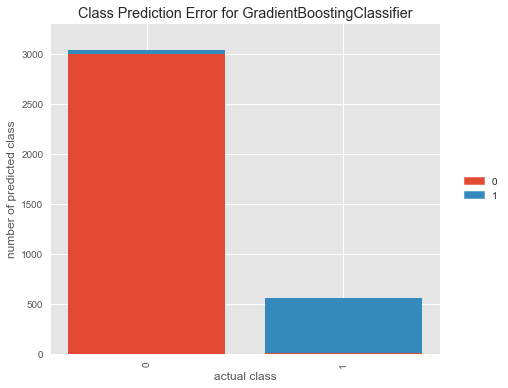

In [252]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(GB_tuned)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#### Prediction Summary

In [253]:
GB_Pred = {"Actual": y_test, "GB_Pred": y_pred}
GB_Pred = pd.DataFrame.from_dict(GB_Pred)
GB_Pred.head()

,Actual,GB_Pred
3118,0,0
10490,0,0
1106,1,1
3822,0,0
6873,0,0


### #KNeighbors Classifier

#### Model Building

In [257]:
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

KNN_model_f1 = f1_score(y_test, y_pred)
KNN_model_acc = accuracy_score(y_test, y_pred)
KNN_model_recall = recall_score(y_test, y_pred)

#### Evaluating Model Performance

In [258]:
eval(KNN_model, X_train, X_test)

[[2916   85]
 [  64  533]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3001
           1       0.86      0.89      0.88       597

    accuracy                           0.96      3598
   macro avg       0.92      0.93      0.93      3598
weighted avg       0.96      0.96      0.96      3598

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6999
           1       0.90      0.90      0.90      1394

    accuracy                           0.97      8393
   macro avg       0.94      0.94      0.94      8393
weighted avg       0.97      0.97      0.97      8393



In [259]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,0.967592,0.958588
Precision,0.901862,0.862460
Recall,0.903156,0.892797
f1,0.902509,0.877366


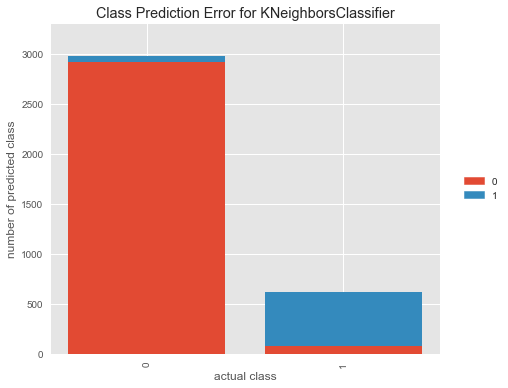

In [260]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(KNN_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# KNeighbors with Cross Validation

In [261]:
KNN_cv = KNeighborsClassifier(n_neighbors = 5)
KNN_cv_scores = cross_validate(KNN_cv, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
KNN_cv_scores = pd.DataFrame(KNN_cv_scores, index = range(1, 11))
KNN_cv_scores.mean()[2:]

test_accuracy     0.958774
test_precision    0.865079
test_recall       0.892369
test_f1           0.878147
test_roc_auc      0.956573
dtype: float64

In [262]:
# Example of K = 2
knn2 = KNeighborsClassifier(n_neighbors = 2)

knn2.fit(X_train,y_train)
pred = knn2.predict(X_test)

In [263]:
# Example of K = 4
knn4 = KNeighborsClassifier(n_neighbors = 4)

knn4.fit(X_train,y_train)
pred = knn4.predict(X_test)

In [264]:
k_values = range(1, 30)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}

In [265]:
KNN_grid = KNeighborsClassifier()
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv = 10, scoring = 'recall')
KNN_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [266]:
KNN_grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

In [267]:
KNN_grid_model.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

## KNN_tuned Predictions and Evaluation

In [268]:
KNN_tuned6 = KNeighborsClassifier(n_neighbors = 6, p = 1, weights = 'distance')
KNN_tuned6.fit(X_train, y_train)
y_pred = KNN_tuned6.predict(X_test)
y_train_pred = KNN_tuned6.predict(X_train)

KNN_tuned6_f1 = f1_score(y_test, y_pred)
KNN_tuned6_acc = accuracy_score(y_test, y_pred)
KNN_tuned6_recall = recall_score(y_test, y_pred)

In [271]:
eval(KNN_tuned6, X_train, X_test)

[[2919   82]
 [  60  537]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3001
           1       0.87      0.90      0.88       597

    accuracy                           0.96      3598
   macro avg       0.92      0.94      0.93      3598
weighted avg       0.96      0.96      0.96      3598

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [272]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,1.0,0.960534
Precision,1.0,0.867528
Recall,1.0,0.899497
f1,1.0,0.883224


#### Prediction Summary

In [270]:
KNN_Pred = {"Actual": y_test, "KNN_Pred":y_pred}
KNN_Pred = pd.DataFrame.from_dict(KNN_Pred)
KNN_Pred.head()

,Actual,KNN_Pred
3118,0,0
10490,0,0
1106,1,1
3822,0,0
6873,0,0


### #Random Forest Classifier

#### Model Building

In [273]:
RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 101)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
y_train_pred = RF_model.predict(X_train)

RF_model_f1 = f1_score(y_test, y_pred)
RF_model_acc = accuracy_score(y_test, y_pred)
RF_model_recall = recall_score(y_test, y_pred)

#### Evaluating Model Performance

In [274]:
eval(RF_model, X_train, X_test)

[[2996    5]
 [  55  542]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.91      0.95       597

    accuracy                           0.98      3598
   macro avg       0.99      0.95      0.97      3598
weighted avg       0.98      0.98      0.98      3598

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [275]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,1.0,0.983324
Precision,1.0,0.990859
Recall,1.0,0.907873
f1,1.0,0.947552


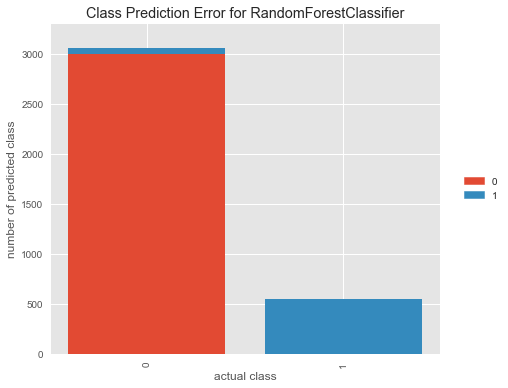

In [276]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [277]:
RF_feature_imp = pd.DataFrame(index=X.columns, data = RF_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
RF_feature_imp

,Importance
satisfaction_level,0.265213
time_spend_company,0.261648
number_project,0.160513
average_monthly_hours,0.149398
last_evaluation,0.133770
departments,0.015110
salary,0.008422
work_accident,0.005484
promotion_last_5years,0.000442


# RF with Cross Validation

In [278]:
RF_cv = RandomForestClassifier(class_weight = "balanced", random_state = 101)
RF_cv_scores = cross_validate(RF_cv, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
RF_cv_scores = pd.DataFrame(RF_cv_scores, index = range(1, 11))
RF_cv_scores.mean()[2:]

test_accuracy     0.982962
test_precision    0.988351
test_recall       0.908135
test_f1           0.946379
test_roc_auc      0.979885
dtype: float64

In [279]:
param_grid = {'n_estimators' : [50, 100, 300],
              'max_features' : [2, 3, 4],
              'max_depth' : [3, 5, 7, 9],
              'min_samples_split' : [2, 5, 8]}

In [281]:
RF_grid = RandomForestClassifier(class_weight = 'balanced', random_state = 101)
RF_grid_model = GridSearchCV(estimator = RF_grid, 
                             param_grid = param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2)
RF_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [2, 3, 4],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 300]},
             scoring='recall', verbose=2)

In [282]:
RF_grid_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=4,
                       n_estimators=300, random_state=101)

In [283]:
RF_grid_model.best_params_

{'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [284]:
RF_tuned = RandomForestClassifier(class_weight = 'balanced',
                                  max_depth = 3,
                                  max_features = 4,
                                  n_estimators = 300,
                                  min_samples_split = 2,
                                  random_state = 101).fit(X_train, y_train)

In [285]:
y_pred = RF_tuned.predict(X_test)
y_train_pred = RF_tuned.predict(X_train)

RF_tuned_f1 = f1_score(y_test, y_pred)
RF_tuned_acc = accuracy_score(y_test, y_pred)
RF_tuned_recall = recall_score(y_test, y_pred)

In [286]:
eval(RF_tuned, X_train, X_test)

[[2838  163]
 [  42  555]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3001
           1       0.77      0.93      0.84       597

    accuracy                           0.94      3598
   macro avg       0.88      0.94      0.90      3598
weighted avg       0.95      0.94      0.95      3598

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6999
           1       0.78      0.93      0.85      1394

    accuracy                           0.95      8393
   macro avg       0.88      0.94      0.91      8393
weighted avg       0.95      0.95      0.95      8393



In [287]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,0.945192,0.943024
Precision,0.779641,0.772981
Recall,0.934003,0.929648
f1,0.849869,0.844106


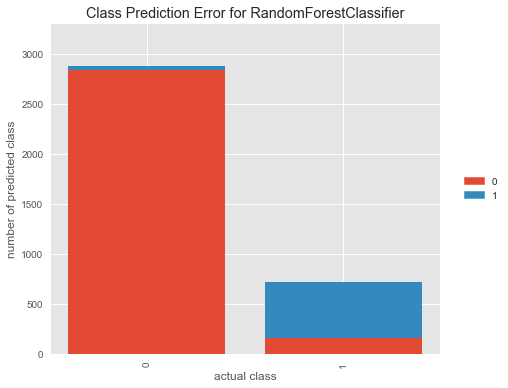

In [288]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(RF_tuned)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#### Prediction Summary

In [289]:
RF_Pred = {"Actual": y_test, "RF_Pred":y_pred}
RF_Pred = pd.DataFrame.from_dict(RF_Pred)
RF_Pred.head()

,Actual,RF_Pred
3118,0,0
10490,0,0
1106,1,1
3822,0,0
6873,0,0


## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [ ]:
model = 

In [ ]:
import pickle
pickle.dump(model, open('', 'wb'))

In [ ]:
my_model = pickle.load(open('', 'rb'))

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___